BDAT1004 - Data Programming - W24, Tuesday Section - Problem Set 3 - Andrea Attridge

Question 1: Occupations

In [11]:
#import necessary libraries
import numpy as np
import pandas as pd

#import dataset and assign to users
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

#show the beinginning of the dataset
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [16]:
#determine mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [19]:
#determine the male ratio per occupation and sort it from most to least

#sort by occupation and gender
occupation_by_gender = users.groupby(['occupation', 'gender'])

#count people per occupation
count = occupation_by_gender.size().unstack()

#determine male ratio
count['Male ratio'] = count['M']/(count['M'] + count ['F'])

#sort male ratio
male_ratio_per_occupation = count['Male ratio'].sort_values(ascending=False)

print(male_ratio_per_occupation)

occupation
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
doctor                NaN
Name: Male ratio, dtype: float64


In [20]:
#for each occupation, calculate the minimum and maximum ages
range_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

print(range_ages_per_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [21]:
#for each combination of occupation and sex, calculate the mean age

mean_age_per_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age_per_occupation_gender)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [23]:
#for each occupation, present the percentage of men and women
occupation_grouped = users.groupby('occupation')

#count people per occupation
gender_count = occupation_grouped['gender'].value_counts().unstack()
total_counts = gender_count.sum(axis=1)

#calculate percentage of each gender by occupation
percentage_gender_per_occupation = gender_count.div(total_counts, axis=0) * 100

print(percentage_gender_per_occupation)

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


Question 2: Euro Teams

In [24]:
#import necessary libraries
import numpy as np
import pandas as pd

#import dataset and assign to users
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')

#show the beinginning of the dataset
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [25]:
#select only the goals column
goals_column = euro12['Goals']

print(goals_column)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [26]:
#determine number of teams that participated in the Euro2012
num_teams = euro12['Team'].nunique()

print("The number of teams that participated in Euro2012:", num_teams)

The number of teams that participated in Euro2012: 16


In [ ]:
#what is the number of columns in the data set?

The dataset has 35 columns (refer to Out [24] when dataset was loaded)

In [27]:
#view only Team, Yellow Cards, Red cards and assign to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [28]:
#sort by Red cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending = False)

print(discipline_sorted)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [29]:
#calculate the mean Yellow cards per team
mean_yellow_cards_per_team = discipline.groupby('Team')['Yellow Cards'].mean()

print(mean_yellow_cards_per_team)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [33]:
#filter teams that scored more than six goals
more_than_six_goals = euro12[euro12['Goals'] > 6]

print(more_than_six_goals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [31]:
#select the teams that start with g
start_with_G = euro12[euro12['Team'].str.startswith('G')]

print(start_with_G)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [34]:
#select the first 7 columns

first_7_columns = euro12.iloc[:, :7]

print(first_7_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [35]:
#select all columns except the last three

all_but_last_3 = euro12.iloc[:, :-3]

print(all_but_last_3)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [40]:
#present the shooting accuracy from England, Italy and Russia

shooting_accuracy_eir = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print(shooting_accuracy_eir)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3: Housing

In [41]:
#import necessary libraries
import numpy as np
import pandas as pd

In [42]:
#create a series of length 100 random numbers between 1 and 4
series1 = pd.Series(np.random.randint(1, 5, size=100))

#create a series of length 100 random numbers between 1 and 3
series2 = pd.Series(np.random.randint(1, 4, size=100))

#create a series of length 100 with random numbers between 10,000 and 30,000
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

print("Series 1: ")
print(series1.head())
print("Series 2: ")
print(series2.head())
print("Series 3: ")
print(series3.head())

Series 1: 
0    1
1    1
2    1
3    3
4    1
dtype: int32
Series 2: 
0    1
1    1
2    1
3    2
4    2
dtype: int32
Series 3: 
0    12320
1    10046
2    25253
3    17378
4    28567
dtype: int32


In [43]:
#create a dataframe by joining the series by column
houses = pd.concat([series1, series2, series3], axis=1)

print(houses)

    0  1      2
0   1  1  12320
1   1  1  10046
2   1  1  25253
3   3  2  17378
4   1  2  28567
.. .. ..    ...
95  3  3  24200
96  2  1  28553
97  1  3  16649
98  3  2  24560
99  4  2  18723

[100 rows x 3 columns]


In [44]:
#rename the columsn to beds, baths, price_sqr_metre
houses = houses.rename(columns={0: 'beds', 1: 'baths', 2: 'price_sqr_meter'})

print(houses)

    beds  baths  price_sqr_meter
0      1      1            12320
1      1      1            10046
2      1      1            25253
3      3      2            17378
4      1      2            28567
..   ...    ...              ...
95     3      3            24200
96     2      1            28553
97     1      3            16649
98     3      2            24560
99     4      2            18723

[100 rows x 3 columns]


In [46]:
#reate a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0)

bigcolumn = bigcolumn.rename('bigcolumn')

print(bigcolumn)

0         1
1         1
2         1
3         3
4         1
      ...  
95    24200
96    28553
97    16649
98    24560
99    18723
Name: bigcolumn, Length: 300, dtype: int32


In [47]:
#reset index

bigcolumn = bigcolumn.reset_index(drop=True)

print(bigcolumn)

0          1
1          1
2          1
3          3
4          1
       ...  
295    24200
296    28553
297    16649
298    24560
299    18723
Name: bigcolumn, Length: 300, dtype: int32


Question 4: Wind Statistics

In [48]:
#import necessary libraries
import numpy as np
import pandas as pd

In [69]:
#import data
wind = pd.read_csv(r'C:\Users\alatt\OneDrive\Documents\BDAT\BDAT1004 - Data Programming\PS3 Data\wind.txt', delimiter='\s+')

#create dataframe
data = pd.DataFrame(wind)

print(data.head())

   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [95]:
#import data
wind = pd.read_csv(r'C:\Users\alatt\OneDrive\Documents\BDAT\BDAT1004 - Data Programming\PS3 Data\wind.txt', delimiter='\s+')

#change all Yr values to 4 digit values
wind['Yr'] = wind['Yr'].apply(lambda x: x + 1900)

#create dataframe
data = pd.DataFrame(wind)

print(data.head())

     Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  1961   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  1961   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  1961   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  1961   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  1961   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [97]:
#read the data
wind = pd.read_csv(r'C:\Users\alatt\OneDrive\Documents\BDAT\BDAT1004 - Data Programming\PS3 Data\wind.txt', delimiter='\s+')

#change all Yr values to 4 digit values
wind['Yr'] = wind['Yr'].apply(lambda x: x + 1900)

#combine the first three columns into a single datetime column
wind['Date'] = pd.to_datetime(wind[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

#set the new datetime column as the index
wind.set_index('Date', inplace=True)

#drop the original Yr, Mo, and Dy columns
wind.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)

print(wind.head())

              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
Date                             
1961-01-01  12.58  18.50  15.04  
1961-01-02   9.67  17.54  13.83  
1961-01-03   7.67  12.75  12.71  
1961-01-04   5.88   5.46  10.88  
1961-01-05  10.34  12.92  11.83  


In [98]:
#compute number of missing values
missing_values_count = wind.isna().sum()

print("Number of missing values for each location:\n",missing_values_count)

Number of missing values for each location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [99]:
#compute total of non-missing values

non_missing_values = wind.size - wind.isna().sum().sum()

print("Total non missing values:\n", non_missing_values)

Total non missing values:
 78857


In [100]:
#calculate mean wind speed for all locations and times
mean_windspeed = wind.stack().mean()

print("The mean windspeed is: ", mean_windspeed)

The mean windspeed is:  10.22788376428218


In [101]:
#create a dataframe called loc_stats and calculate the min, max and mean windwpeeds and stdev of windspeeds at each location
loc_stats = wind.describe()

print("Summary statistics for windspeeds at each location:")
print(loc_stats)

Summary statistics for windspeeds at each location:
               RPT          VAL          ROS          KIL          SHA  \
count  6568.000000  6571.000000  6572.000000  6569.000000  6572.000000   
mean     12.362987    10.644314    11.660526     6.306468    10.455834   
std       5.618413     5.267356     5.008450     3.605811     4.936125   
min       0.670000     0.210000     1.500000     0.000000     0.130000   
25%       8.120000     6.670000     8.000000     3.580000     6.750000   
50%      11.710000    10.170000    10.920000     5.750000     9.960000   
75%      15.920000    14.040000    14.670000     8.420000    13.540000   
max      35.800000    33.370000    33.840000    28.460000    37.540000   

               BIR          DUB          CLA          MUL          CLO  \
count  6574.000000  6571.000000  6572.000000  6571.000000  6573.000000   
mean      7.092254     9.797343     8.495053     8.493590     8.707332   
std       3.968683     4.977555     4.499449     4.166872  

In [102]:
#create a dataframe called day_stats and calculate the min, max and mean mindspeed and stdev across all locations each day
# Transpose the DataFrame
transposed_wind = wind.T

# Calculate summary statistics for each day across all locations
day_stats = transposed_wind.describe()

# Display the result
print("Summary statistics for windspeeds across all locations at each day:")
print(day_stats)

Summary statistics for windspeeds across all locations at each day:
Date   1961-01-01  1961-01-02  1961-01-03  1961-01-04  1961-01-05  1961-01-06  \
count   11.000000   11.000000   11.000000   12.000000   12.000000   12.000000   
mean    13.018182   11.336364   11.641818    6.619167   10.630000    8.240000   
std      2.808875    3.188994    3.681912    3.198126    2.445356    2.998063   
min      9.290000    6.500000    6.170000    1.790000    6.170000    4.420000   
25%     10.540000    9.730000    9.315000    4.570000    9.807500    6.345000   
50%     13.170000   10.830000   11.250000    5.855000   11.170000    7.810000   
75%     15.000000   13.225000   12.730000    9.117500   12.170000   10.137500   
max     18.500000   17.540000   18.500000   11.750000   13.330000   13.210000   

Date   1961-01-07  1961-01-08  1961-01-09  1961-01-10  ...  1978-12-22  \
count   12.000000   12.000000   12.000000    12.00000  ...   12.000000   
mean    10.385000   10.487500    9.897500    10.47750 

In [103]:
#find average windspeed in January for each location
january_data = wind[wind.index.month == 1]

average_january_windspeed = january_data.mean()

print("Average windspeed in January for each location:")
print(average_january_windspeed)

Average windspeed in January for each location:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [104]:
#downsample to a yearly frequency for each location
yearly_mean_windspeed = wind.resample('Y').mean()

print("Yearly mean windspeed for each location:")
print(yearly_mean_windspeed)

Yearly mean windspeed for each location:
                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123  

In [105]:
#downsample to a monthly frequency for each location
monthly_mean_windspeed = wind.resample('M').mean()

print("Monthly mean windspeed for each location:")
print(monthly_mean_windspeed)

Monthly mean windspeed for each location:
                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31

In [107]:
#downsample to a weeklyfrequency for each location
weekly_mean_windspeed = wind.resample('W').mean()

print("Weekly mean windspeed for each location:")
print(weekly_mean_windspeed)

Weekly mean windspeed for each location:
                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   

In [110]:
#calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week for the first 52 weeks
weekly_data = wind.loc['1961-01-02':'1962-01-02'].resample('W').agg(['min', 'max', 'mean', 'std'])

weekly_data_first_52_weeks = weekly_data.iloc[:52]

print(weekly_data_first_52_weeks)

              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3

Question 5: Chipotle

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

#read the data into a DataFrame
chipo = pd.read_csv(url, sep='\t')

#display the first ten entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
#find the number of observations in the dataset
num_observations = chipo.shape[0]

print("Number of observations in the dataset:", num_observations)

Number of observations in the dataset: 4622


In [6]:
#find the number of columns in the dataset
num_columns = chipo.shape[1]

print("Number of columns in the dataset:", num_columns)

Number of columns in the dataset: 5


In [8]:
#print the names of the columns
name_columns = chipo.columns

print("Names of the columns:")
for name_columns in name_columns:
    print(name_columns)

Names of the columns:
order_id
quantity
item_name
choice_description
item_price


In [9]:
#find indexing inforamtion
index_info = chipo.index

print("Index information of the dataset:")
print(index_info)

Index information of the dataset:
RangeIndex(start=0, stop=4622, step=1)


In [10]:
#find the most ordered item
most_ordered_item = chipo.groupby('item_name')['quantity'].sum()

most_ordered_item = most_ordered_item.idxmax()

print("The most-ordered item is:", most_ordered_item)

The most-ordered item is: Chicken Bowl


In [11]:
#find the number of most ordered item ordered
item_quantities = chipo.groupby('item_name')['quantity'].sum()

quantity_most_ordered_item = item_quantities[most_ordered_item]

print("Number of", most_ordered_item, "ordered:", quantity_most_ordered_item)

Number of Chicken Bowl ordered: 761


In [12]:
#find the most ordered items in the choice_description column
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum()

most_ordered_choice = most_ordered_choice.idxmax()

print("The most-ordered item in the choice_description column is:", most_ordered_choice)

The most-ordered item in the choice_description column is: [Diet Coke]


In [13]:
#find how many items were ordered in total
total_items_ordered = chipo['quantity'].sum()

print("Total number of items ordered:", total_items_ordered)

Total number of items ordered: 4972


In [14]:
#turn the item price into a float and check the price type
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

print("Type of item price:", chipo['item_price'].dtype)

Type of item price: float64


In [15]:
#create a lambda function and change the type of item price
convert_to_string = lambda x: str(x)

chipo['item_price'] = chipo['item_price'].apply(convert_to_string)

print("Type of item price:", chipo['item_price'].dtype)

Type of item price: object


In [16]:
#turn the item price back into a float and check the price type (in case it is needed later)
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

print("Type of item price:", chipo['item_price'].dtype)

Type of item price: float64


In [17]:
#find the revenue for the period in the dataset
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

total_revenue = chipo['revenue'].sum()

print("Total revenue:", total_revenue)

Total revenue: 39237.02


In [21]:
#find the total number of orders
num_orders = chipo['order_id'].nunique()

print("Number of orders made in the period:", num_orders)

Number of orders made in the period: 1834


In [22]:
#find the average revenue per order
total_revenue = chipo['revenue'].sum()

num_orders = chipo['order_id'].nunique()

average_revenue_per_order = total_revenue / num_orders

print("Average revenue amount per order:", average_revenue_per_order)

Average revenue amount per order: 21.39423118865867


In [23]:
#find how mnay items were sold
unique_items = chipo['item_name'].nunique()

print("Number of different items sold:", unique_items)

Number of different items sold: 50


Question 6: Marriages and Divorces Line Graph

In [27]:
#import libraries and read data
import pandas as pd
import matplotlib.pyplot as plt
us = pd.read_csv(r"C:\Users\alatt\OneDrive\Documents\BDAT\BDAT1004 - Data Programming\PS3 Data\us-marriages-divorces-1867-2014.csv")
us.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


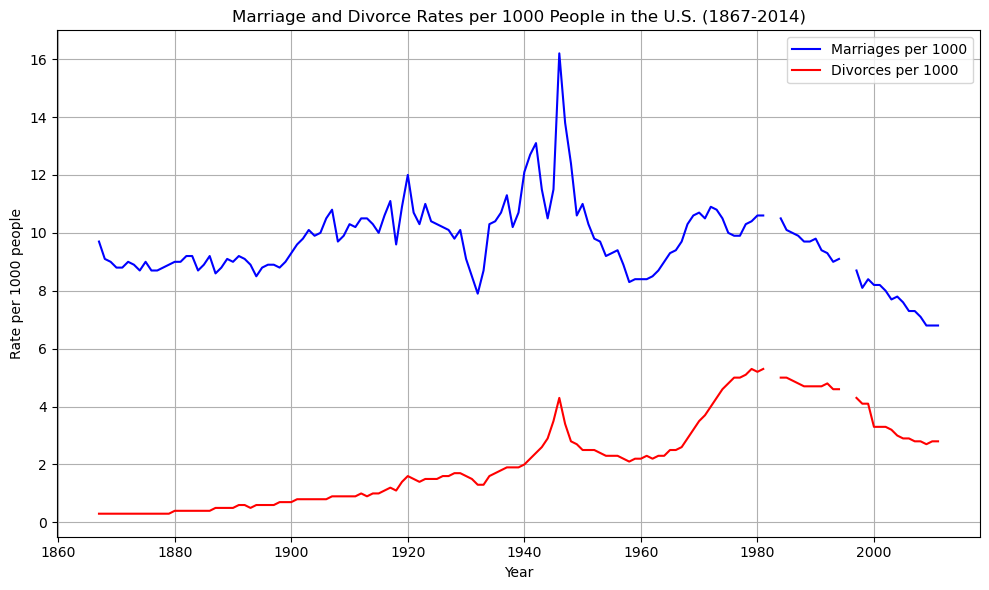

In [29]:
#create a line plot showing marriages and divorces percapita

plt.figure(figsize=(10, 6))
plt.plot(us['Year'], us['Marriages_per_1000'], label='Marriages per 1000', color='blue')
plt.plot(us['Year'], us['Divorces_per_1000'], label='Divorces per 1000', color='red')

plt.xlabel('Year')
plt.ylabel('Rate per 1000 people')
plt.title('Marriage and Divorce Rates per 1000 People in the U.S. (1867-2014)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Question 7: Comparing Years

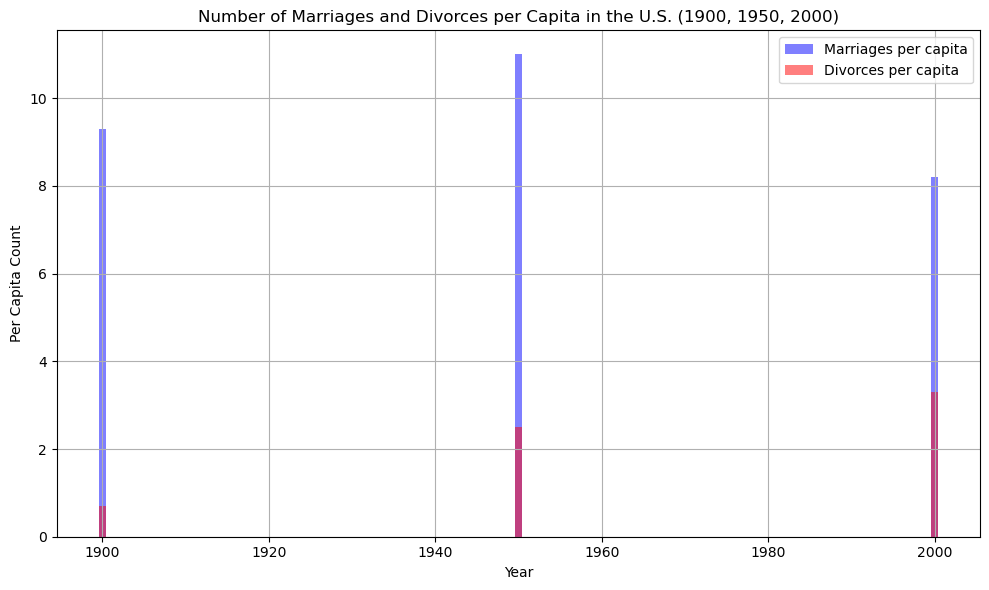

In [31]:
#create a vertical bar chart comparing marriages and divorces per capita in 1900, 1950 and 2000
years = [1900, 1950, 2000]
filtered_data = us[us['Year'].isin(years)]

plt.figure(figsize=(10, 6))
plt.bar(filtered_data['Year'], filtered_data['Marriages_per_1000'], label='Marriages per capita', color='blue', alpha=0.5)
plt.bar(filtered_data['Year'], filtered_data['Divorces_per_1000'], label='Divorces per capita', color='red', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Question 8: Deadliest Hollywood actors

In [32]:
#import libraries and read data
import pandas as pd
import matplotlib.pyplot as plt
hollywood = pd.read_csv(r"C:\Users\alatt\OneDrive\Documents\BDAT\BDAT1004 - Data Programming\PS3 Data\actor_kill_counts.csv")
hollywood.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


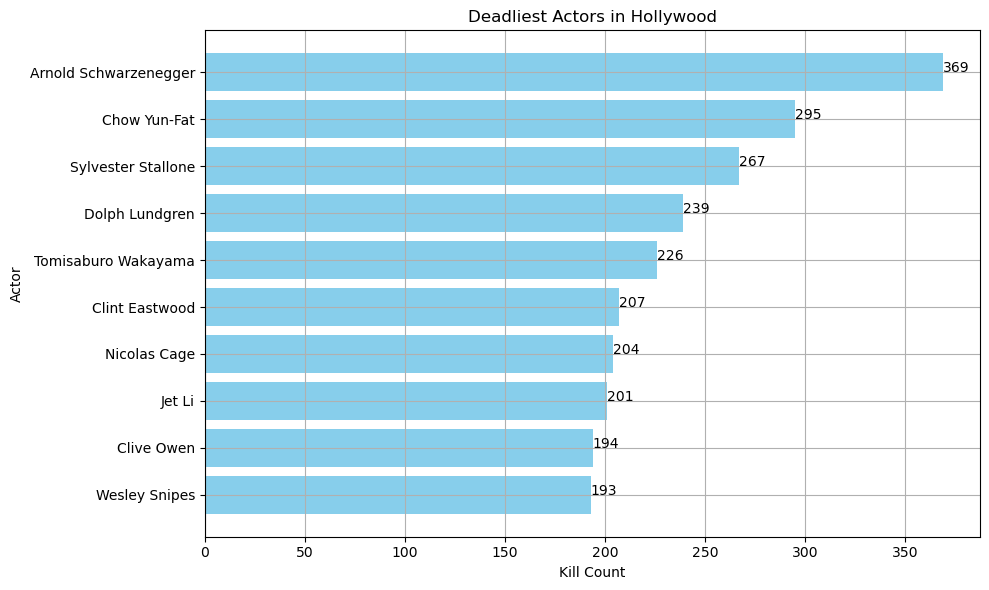

In [34]:
#create a horizontal bar chart comparing deadliest actors in hollywood
hollywood_sorted = hollywood.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(hollywood_sorted['Actor'], hollywood_sorted['Count'], color='skyblue')

for index, value in enumerate(hollywood_sorted['Count']):
    plt.text(value, index, str(value))

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

plt.grid(True)
plt.tight_layout()
plt.show()

Question 9: Roam Emperor Assassinations

In [35]:
#import libraries and read data
import pandas as pd
import matplotlib.pyplot as plt
roman = pd.read_csv(r"C:\Users\alatt\OneDrive\Documents\BDAT\BDAT1004 - Data Programming\PS3 Data\roman-emperor-reigns.csv")
roman.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


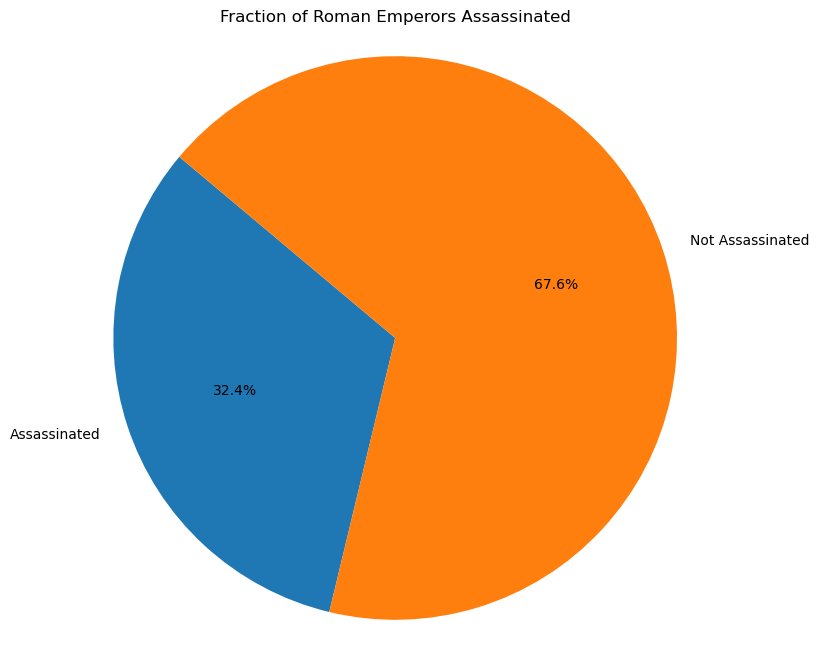

In [38]:
#create a pie chart that shows the fraction of emperors that were assassinated
total_emperors = len(roman)

assassinated_emperors = (roman['Cause_of_Death'] == 'Assassinated').sum()

percentage_assassinated = (assassinated_emperors / total_emperors) * 100

percentage_not_assassinated = 100 - percentage_assassinated

labels = ['Assassinated', 'Not Assassinated']

sizes = [percentage_assassinated, percentage_not_assassinated]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title('Fraction of Roman Emperors Assassinated')

plt.show()

Question 10: Computer Science PhD Revenue

In [39]:
#import libraries and read data
import pandas as pd
import matplotlib.pyplot as plt
phdrevenue = pd.read_csv(r"C:\Users\alatt\OneDrive\Documents\BDAT\BDAT1004 - Data Programming\PS3 Data\arcade-revenue-vs-cs-doctorates.csv")
phdrevenue.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


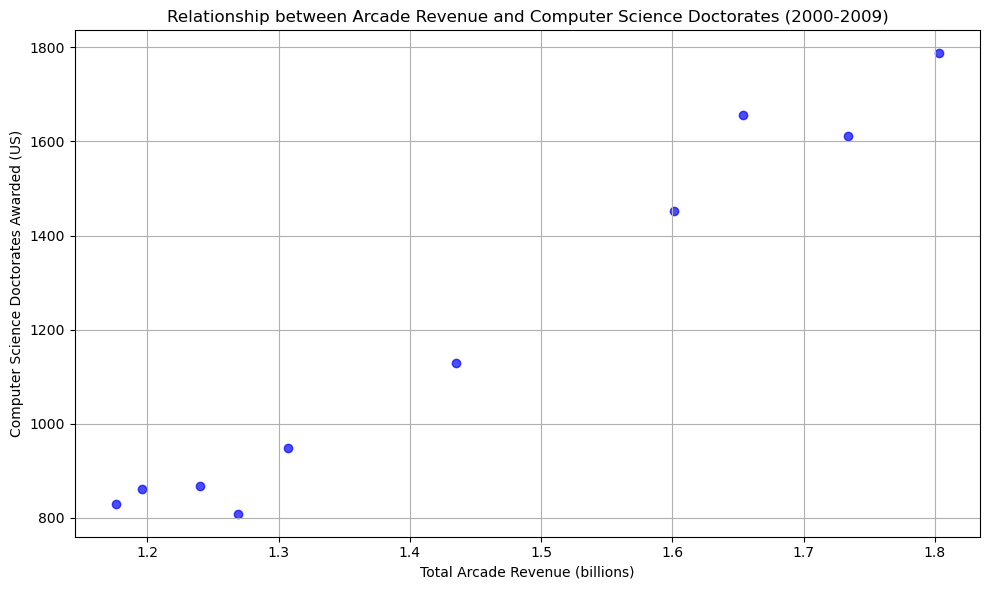

In [40]:
#create a scatterplot showing relationship between arcade revenue and PhDs awarded
phdrevenue_filtered = phdrevenue[(phdrevenue['Year'] >= 2000) & (phdrevenue['Year'] <= 2009)]

plt.figure(figsize=(10, 6))
plt.scatter(phdrevenue_filtered['Total Arcade Revenue (billions)'], 
            phdrevenue_filtered['Computer Science Doctorates Awarded (US)'], 
            color='blue', alpha=0.7)

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates (2000-2009)')

plt.grid(True)
plt.tight_layout()
plt.show()

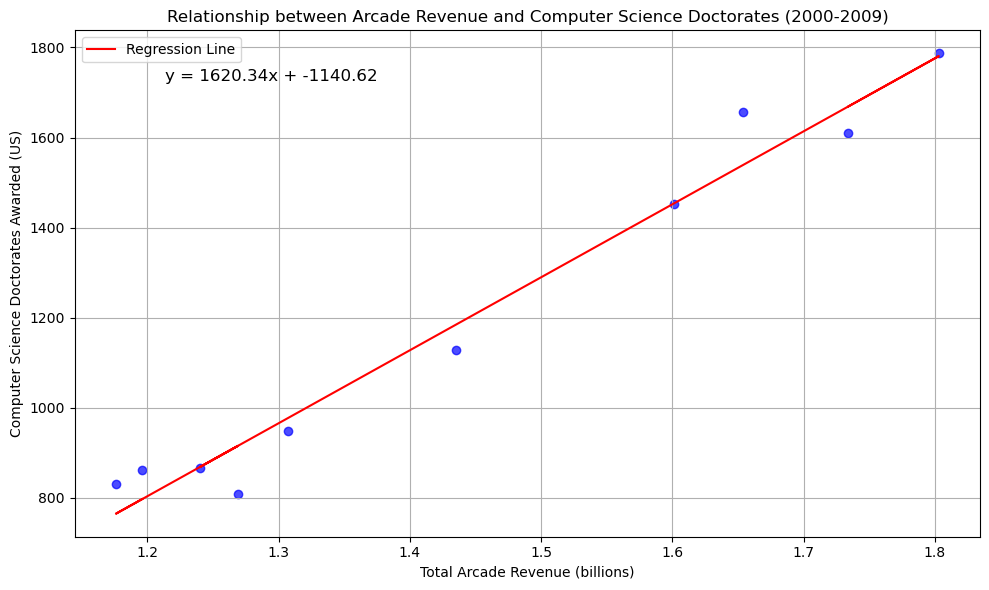

In [42]:
#just for interest sake, a little regression :)
import numpy as np
from sklearn.linear_model import LinearRegression

phdrevenue_filtered = phdrevenue[(phdrevenue['Year'] >= 2000) & (phdrevenue['Year'] <= 2009)]

x = phdrevenue_filtered['Total Arcade Revenue (billions)'].values.reshape(-1, 1)
y = phdrevenue_filtered['Computer Science Doctorates Awarded (US)'].values

model = LinearRegression()
model.fit(x, y)

m = model.coef_[0]
b = model.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7)

plt.plot(x, m * x + b, color='red', label='Regression Line')

equation = f'y = {m:.2f}x + {b:.2f}'
plt.text(0.1, 0.9, equation, fontsize=12, transform=plt.gca().transAxes)

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates (2000-2009)')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()